# Homework 7, Part One: Lots and lots of questions about beer

### Do your importing and your setup

In [189]:
import pandas as pd
pd.set_option('display.max_rows', None)

import matplotlib.pyplot as plt

## Read in the file `craftcans.csv`, and look at the first first rows

In [190]:
file = pd.read_csv("craftcans.csv", na_values=["nan",'Does not apply'])
beerdf = pd.DataFrame(file)
beerdf.head()

Beer            Brewery         Location               Style  \
0   Get Together  NorthGate Brewing  Minneapolis, MN        American IPA   
1  Maggie's Leap  NorthGate Brewing  Minneapolis, MN  Milk / Sweet Stout   
2     Wall's End  NorthGate Brewing  Minneapolis, MN   English Brown Ale   
3        Pumpion  NorthGate Brewing  Minneapolis, MN         Pumpkin Ale   
4     Stronghold  NorthGate Brewing  Minneapolis, MN     American Porter   

     Size    ABV  IBUs  
0  16 oz.  4.50%  50.0  
1  16 oz.  4.90%  26.0  
2  16 oz.  4.80%  19.0  
3  16 oz.  6.00%  38.0  
4  16 oz.  6.00%  25.0

## How many rows do you have in the data? What are the column types?

In [191]:
#rows
len(beerdf)

2416

In [192]:
beerdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Beer      2416 non-null   object 
 1   Brewery   2410 non-null   object 
 2   Location  2410 non-null   object 
 3   Style     2405 non-null   object 
 4   Size      2410 non-null   object 
 5   ABV       2348 non-null   object 
 6   IBUs      1405 non-null   float64
dtypes: float64(1), object(6)
memory usage: 132.3+ KB


# Checking out our alcohol

## What are the top 10 producers in terms of different cans of beer?

In [193]:
beerdf["Brewery"].value_counts().head(10)

Brewery
Brewery Vivant                62
Oskar Blues Brewery           46
Sun King Brewing Company      38
Cigar City Brewing Company    25
Sixpoint Craft Ales           24
Hopworks Urban Brewery        23
Stevens Point Brewery         22
Great Crescent Brewery        20
21st Amendment Brewery        20
Bonfire Brewing Company       19
Name: count, dtype: int64

## What is the most common ABV? (alcohol by volume)

In [194]:
beerdf["ABV"].value_counts().head(5)

ABV
5.00%    215
5.50%    158
6.00%    125
6.50%    123
5.20%    107
Name: count, dtype: int64

#### Most common ABV is 5%

## Oh, weird, ABV isn't a number. Convert it to a number for me, please.

It's going to take a few steps!

### First, let's just look at the ABV column by itself

In [195]:
beerdf["ABV"].isnull().value_counts()

ABV
False    2348
True       68
Name: count, dtype: int64

### Hm, `%` isn't part of  a number. Let's remove it.

When you're confident you got it right, save the results back into the `ABV` column.

- *Tip: In programming the easiest way to remove something is to *replacing it with nothing*.*
- *Tip: "nothing" might seem like `NaN` sinc we talked about it a lot in class, but in this case it isn't! It's just an empty string, like ""*
- *Tip: `.replace` is used for replacing ENTIRE cells, while `.str.replace` is useful for replacing PARTS of cells (see my New York example)*

In [196]:
beerdf["ABV"] = beerdf["ABV"].str.replace("%","")

### Now let's turn `ABV` into a numeric data type

Save the results back into the `ABV` column (again), and then check `df.dtypes` to make sure it worked.

- *Tip: We used `.astype(int)` during class, but this has a decimal in it...*

In [197]:
beerdf['ABV'] = beerdf["ABV"].astype(float)
beerdf["ABV"]

0        4.5
1        4.9
2        4.8
3        6.0
4        6.0
5        5.6
6        8.0
7       12.5
8        7.7
9        4.2
10       5.0
11       6.6
12       4.0
13       5.5
14       7.6
15       5.1
16       6.5
17       6.0
18       5.0
19       5.2
20       4.8
21       7.2
22       6.7
23       4.9
24       8.0
25       7.5
26       6.0
27       8.0
28       6.3
29       5.8
30       4.7
31       5.6
32       4.6
33       6.3
34       9.3
35       6.2
36       6.0
37       4.8
38       7.7
39       9.7
40       5.0
41       8.7
42       6.1
43       7.1
44       8.3
45       5.0
46       9.5
47       7.3
48       7.1
49       6.5
50       8.0
51       5.2
52       6.7
53       6.0
54       4.1
55       4.8
56       5.5
57       4.8
58       5.8
59       6.5
60       5.0
61       5.0
62       5.8
63       4.5
64       8.5
65       6.5
66       5.8
67       5.2
68      12.0
69       7.2
70       5.8
71       7.0
72       5.5
73       5.5
74       5.4
75       5.3
76       5.5

## What's the ABV of the average beer look like?

### Show me in two different ways: one command to show the `median`/`mean`/etc, and secondly show me a chart

In [198]:
beerdf["ABV"].mean()

np.float64(5.977342419080068)

<Axes: >

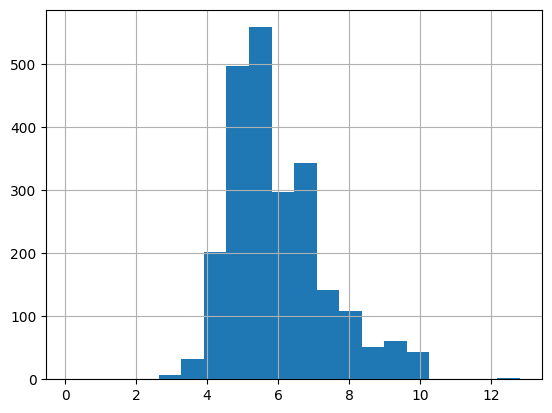

In [199]:
beerdf["ABV"].hist(bins = 20)

### We don't have ABV for all of the beers, how many are we missing them from?

- *Tip: You can use `isnull()` or `notnull()` to see where a column is missing data.*
- *Tip: You just want to count how many `True`s and `False`s there are.*
- *Tip: It's a weird trick involving something we usually use to count things in a column*

In [200]:
beerdf["ABV"].isnull().value_counts()

#there are 68 null values

ABV
False    2348
True       68
Name: count, dtype: int64

# Looking at location

Brooklyn used to produce 80% of the country's beer! Let's see if it's still true.

## What are the top 10 cities in the US for canned craft beer?

In [201]:
beerdf["Location"].value_counts().head(10)

Location
Grand Rapids, MI    66
Chicago, IL         55
Portland, OR        52
Indianapolis, IN    43
San Diego, CA       42
Boulder, CO         41
Denver, CO          40
Brooklyn, NY        38
Seattle, WA         35
Longmont, CO        33
Name: count, dtype: int64

## List all of the beer from Brooklyn, NY

In [202]:
beerdf[beerdf["Location"] == "Brooklyn, NY"]

Beer              Brewery      Location  \
115                            4Beans  Sixpoint Craft Ales  Brooklyn, NY   
210                            Jammer  Sixpoint Craft Ales  Brooklyn, NY   
246                           Abigale  Sixpoint Craft Ales  Brooklyn, NY   
404                     Nomader Weiss    Evil Twin Brewing  Brooklyn, NY   
421                               Rad  Sixpoint Craft Ales  Brooklyn, NY   
439                      Molotov Lite    Evil Twin Brewing  Brooklyn, NY   
588                           Bengali  Sixpoint Craft Ales  Brooklyn, NY   
713                     Sensi Harvest  Sixpoint Craft Ales  Brooklyn, NY   
969                            Hi-Res  Sixpoint Craft Ales  Brooklyn, NY   
987             KelSo Nut Brown Lager   KelSo Beer Company  Brooklyn, NY   
1057                    Global Warmer  Sixpoint Craft Ales  Brooklyn, NY   
1074               Autumnation (2013)  Sixpoint Craft Ales  Brooklyn, NY   
1093             KelSo India Pale Ale   KelSo Beer Company  Brooklyn, NY   
1267                        The Crisp  Sixpoint Craft Ales  Brooklyn, NY   
1268                     Sweet Action  Sixpoint Craft Ales  Brooklyn, NY   
1269                    Righteous Ale  Sixpoint Craft Ales  Brooklyn, NY   
1270                    Bengali Tiger  Sixpoint Craft Ales  Brooklyn, NY   
1305                    KelSo Pilsner   KelSo Beer Company  Brooklyn, NY   
1365  Hipster Ale (Two Roads Brewing)    Evil Twin Brewing  Brooklyn, NY   
1366                      Bikini Beer    Evil Twin Brewing  Brooklyn, NY   
1373              East India Pale Ale     Brooklyn Brewery  Brooklyn, NY   
1624                           3Beans  Sixpoint Craft Ales  Brooklyn, NY   
1836                       Brownstone  Sixpoint Craft Ales  Brooklyn, NY   
1857              Brooklyn Summer Ale     Brooklyn Brewery  Brooklyn, NY   
1962  Hipster Ale (Westbrook Brewing)    Evil Twin Brewing  Brooklyn, NY   
1970                           Apollo  Sixpoint Craft Ales  Brooklyn, NY   
1971                        Harbinger  Sixpoint Craft Ales  Brooklyn, NY   
1972                            Resin  Sixpoint Craft Ales  Brooklyn, NY   
2027              East India Pale Ale     Brooklyn Brewery  Brooklyn, NY   
2062                           Diesel  Sixpoint Craft Ales  Brooklyn, NY   
2074     Autumnation (2011-12) (2011)  Sixpoint Craft Ales  Brooklyn, NY   
2140                 The Crisp (2011)  Sixpoint Craft Ales  Brooklyn, NY   
2141              Sweet Action (2011)  Sixpoint Craft Ales  Brooklyn, NY   
2142             Righteous Ale (2011)  Sixpoint Craft Ales  Brooklyn, NY   
2143             Bengali Tiger (2011)  Sixpoint Craft Ales  Brooklyn, NY   
2219       Brooklyn Summer Ale (2011)     Brooklyn Brewery  Brooklyn, NY   
2350          Brooklyn Lager (16 oz.)     Brooklyn Brewery  Brooklyn, NY   
2351          Brooklyn Lager (12 oz.)     Brooklyn Brewery  Brooklyn, NY   

                               Style               Size   ABV   IBUs  
115                    Baltic Porter             12 oz.  10.0   52.0  
210                             Gose    12 oz. Slimline   4.2   16.0  
246                 Belgian Pale Ale             12 oz.   8.0    NaN  
404               Berliner Weissbier             12 oz.   4.0    NaN  
421           Fruit / Vegetable Beer             16 oz.   3.2    7.0  
439   American Double / Imperial IPA             16 oz.   8.5    NaN  
588                     American IPA  24 oz. "Silo Can"   6.5   62.0  
713          American Pale Ale (APA)             12 oz.   4.7   50.0  
969   American Double / Imperial IPA             12 oz.   9.9  111.0  
987                  Euro Dark Lager             12 oz.   5.7   19.0  
1057             American Strong Ale             12 oz.   7.0   70.0  
1074                    American IPA             16 oz.   6.7   74.0  
1093                    American IPA             12 oz.   6.0   64.0  
1267                 German Pilsener             16 oz.   5.4   42.0  
126

## What brewery in Brooklyn puts out the most different cans of beer?

In [203]:
brooklyn_beers = beerdf[beerdf["Location"] == "Brooklyn, NY"]

brooklyn_beers["Brewery"].value_counts()

# Sixpoint Craft Ales put out 24 different cans of beer although this code considered cans 
# of different sizes (ex. 16oz vs 12oz) as "different" too

Brewery
Sixpoint Craft Ales    24
Brooklyn Brewery        6
Evil Twin Brewing       5
KelSo Beer Company      3
Name: count, dtype: int64

## What are the five most common styles of beer produced by Sixpoint?

In [204]:
brooklyn_beers[brooklyn_beers["Brewery"] == "Sixpoint Craft Ales"]["Style"].value_counts().head(5)

Style
American IPA                      4
Baltic Porter                     2
American Double / Imperial IPA    2
German Pilsener                   2
Cream Ale                         2
Name: count, dtype: int64

## List all of the breweries in New York state.

- *Tip: We want to match *part* of the `Location` column, but not all of it.*
- *Tip: Watch out for `NaN` values! You might be close, but you'll need to pass an extra parameter to make it work without an error.*

In [205]:
ny_beers = beerdf[beerdf['Location'].str.contains("NY", na = False)]
ny_beers.head()

Beer              Brewery      Location                   Style  \
115         4Beans  Sixpoint Craft Ales  Brooklyn, NY           Baltic Porter   
210         Jammer  Sixpoint Craft Ales  Brooklyn, NY                    Gose   
246        Abigale  Sixpoint Craft Ales  Brooklyn, NY        Belgian Pale Ale   
404  Nomader Weiss    Evil Twin Brewing  Brooklyn, NY      Berliner Weissbier   
421            Rad  Sixpoint Craft Ales  Brooklyn, NY  Fruit / Vegetable Beer   

                Size   ABV  IBUs  
115           12 oz.  10.0  52.0  
210  12 oz. Slimline   4.2  16.0  
246           12 oz.   8.0   NaN  
404           12 oz.   4.0   NaN  
421           16 oz.   3.2   7.0

### Now *count* all of the breweries in New York state

In [206]:
len(ny_beers["Brewery"].value_counts())

#16 breweries in NY state

16

# Measuring International Bitterness Units

## Display all of the IPAs

Include American IPAs, Imperial IPAs, and anything else with "IPA in it."

IPA stands for [India Pale Ale](https://www.bonappetit.com/story/ipa-beer-styles), and is probably the most popular kind of beer in the US for people who are drinking [craft beer](https://www.craftbeer.com/beer/what-is-craft-beer).

In [207]:
#all IPAs
IPAs = beerdf[beerdf["Style"].str.contains("IPA", na = False)]
IPAs

Beer  \
0                                        Get Together   
6                                      Citra Ass Down   
14                                        Rico Sauvin   
17                                       Pile of Face   
24                                     Habitus (2014)   
25                                              Solis   
27                                            Habitus   
33                                           Villager   
38                                             HopArt   
39                                           Boy King   
43                                             Rumble   
45                                              Lasso   
48                                          Titan IPA   
55                                           Nordskye   
59                  98 Problems (Cuz A Hop Ain't One)   
61                                     Grapefruit IPA   
62                                       Train Hopper   
71                                           Thai.p.a   
78                                           The 26th   
79                                         The Gadget   
86                                         Galaxyfest   
87                                          Citrafest   
89                                         Gone A-Rye   
92                                 Linnaeus Mango IPA   
93                                      Heavy Lifting   
96                                 Grapefruit Sculpin   
97                                        Liberty Ale   
100                                              Raja   
104                                        Galaxy IPA   
107                             Mosaic Single Hop IPA   
108                                       Lost Galaxy   
110                                           Jah Mon   
111                                               IPA   
117                                       Hop Session   
120                                         Easy Jack   
123                                    Flying Mouse 4   
131                                              Moar   
132                            Uber Lupin Schwarz IPA   
146                                  Todd the Axe Man   
148                              Barrel Aged Triomphe   
149                                    Citra Ass Down   
152                   Monkey Dancing On A Razor Blade   
154                                    Vinyl Frontier   
155                                    Disco Superfly   
156                                Misty Mountain Hop   
157                                 One-Hit Wonderful   
160                              Love In An Ellavator   
168                                        Soul Doubt   
170                                      Bimini Twist   
174                                    Pump House IPA   
175                                Suicide Blonde IPA   
178                                         Long Leaf   
182                                    Double Duckpin   
186                                        Hop A-Peel   
191                                      Nuit Serpent   
192                                            Wobble   
196                                          I.P. Eh!   
203                            Baby Daddy Session IPA   
213                                    The Grand Army   
214                                         Slow Ride   
218                                  Hopkick Dropkick   
220                                            Ryecoe   
226                                        Union Jack   
229                                    India Pale Ale   
231                                        Chupahopra   
235                                       Galaxy High   
239                                      Self Starter   
241                                           Reactor   
248                                       Mission IPA   
249                   Bay of Bengal Double IPA (2014)   
25

In [208]:
#different types of IPAs
IPAs["Style"].value_counts()

Style
American IPA                      424
American Double / Imperial IPA    105
Belgian IPA                        18
English India Pale Ale (IPA)       13
American White IPA                 11
Name: count, dtype: int64

IPAs are usually pretty hoppy and bitter. IBU stands for [International Bitterness Unit](http://www.thebrewenthusiast.com/ibus/), and while a lot of places like to brag about having the most bitter beer (it's an American thing!), IBUs don't necessary *mean anything*.

Let's look at how different beers have different IBU measurements.

## Try to get the average IBU measurement across all beers

In [209]:
beerdf['IBUs'].unique()

array([ 50.,  26.,  19.,  38.,  25.,  47.,  68.,  80.,  42.,  21.,  13.,
        17.,  nan,  65.,  20.,  18.,  15.,  45., 100.,  85.,  24.,  30.,
        28.,  16.,  75.,  35.,  54.,  12.,  10.,  40.,  72.,  90.,  46.,
        64.,  31.,  37.,  27.,  58.,  29.,  23.,  22.,  11.,  60.,   8.,
        34.,  52.,  70.,  51.,  44.,  33.,   5.,  82., 115.,  69.,  55.,
        63.,  67.,  93.,  66., 126.,  61.,  36.,  87.,  88., 103.,   6.,
         9.,  14.,  49.,  32.,  89.,  43.,  71.,   7.,  73.,  41.,  53.,
        62.,  77.,  86., 118.,  81., 130.,  99.,  76.,  48.,  39.,  83.,
       108.,  74., 104., 110., 111., 135.,  95.,  92.,  78., 101.,  94.,
        98.,  57.,   4., 120., 138., 105.,  91.,  97., 113.])

In [210]:
beerdf[beerdf["IBUs"].isnull()].head()

Beer                    Brewery        Location  \
16  Kamen Knuddeln  Against the Grain Brewery  Louisville, KY   
34      Blackbeard      COAST Brewing Company  Charleston, SC   
35        Rye Knot      COAST Brewing Company  Charleston, SC   
36        Dead Arm      COAST Brewing Company  Charleston, SC   
37  32°/50° Kölsch      COAST Brewing Company  Charleston, SC   

                               Style    Size  ABV  IBUs  
16                 American Wild Ale  16 oz.  6.5   NaN  
34  American Double / Imperial Stout  12 oz.  9.3   NaN  
35                American Brown Ale  12 oz.  6.2   NaN  
36           American Pale Ale (APA)  12 oz.  6.0   NaN  
37                            Kölsch  16 oz.  4.8   NaN

### Oh no, it doesn't work!

It looks like some of those values *aren't numbers*. There are two ways to fix this:

- *Tip: If you use [`na_values`](http://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.read_csv.html). be sure to go add it up top and run all of your cells again. You can also use `.replace` but I don't think that's as good of an idea.*
- *Tip: Make sure you're giving `na_values` a LIST, not just a string*

### Now try to get the average IBUs again

In [211]:
# added to na_values
avg_IBUs = beerdf["IBUs"].astype(float).mean()
print(f"{avg_IBUs:.02f}")

42.71


## Draw the distribution of IBU measurements, but with *twenty* bins instead of the default of 10

- *Tip: Every time I ask for a distribution, I'm looking for a histogram*

<Axes: >

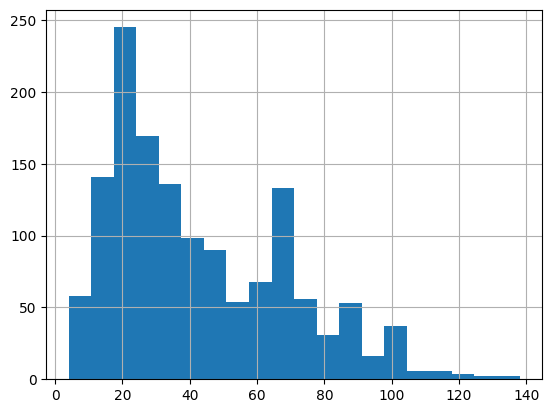

In [212]:
beerdf["IBUs"].hist(bins = 20)

## Hm, Interesting distribution. List all of the beers with IBUs above the 75th percentile

- *Tip: There's a single that gives you the 25/50/75th percentile*
- *Tip: You can just manually type the number when you list those beers*

In [213]:
beerdf["IBUs"].describe()

count    1405.000000
mean       42.713167
std        25.954066
min         4.000000
25%        21.000000
50%        35.000000
75%        64.000000
max       138.000000
Name: IBUs, dtype: float64

In [214]:
# beers with IBUs above 75th percentile 
beerdf[beerdf["IBUs"] > 64.0]

Beer  \
6                                 Citra Ass Down   
7                                 London Balling   
14                                   Rico Sauvin   
17                                  Pile of Face   
21                                    Excess IPL   
22                                Hoponius Union   
24                                Habitus (2014)   
25                                         Solis   
27                                       Habitus   
46                           Yeti Imperial Stout   
59             98 Problems (Cuz A Hop Ain't One)   
62                                  Train Hopper   
68                                          Csar   
69                                Saucy Intruder   
79                                    The Gadget   
89                                    Gone A-Rye   
93                                 Heavy Lifting   
110                                      Jah Mon   
123                               Flying Mouse 4   
149                               Citra Ass Down   
168                                   Soul Doubt   
170                                 Bimini Twist   
178                                    Long Leaf   
182                               Double Duckpin   
186                                   Hop A-Peel   
192                                       Wobble   
218                             Hopkick Dropkick   
226                                   Union Jack   
229                               India Pale Ale   
239                                 Self Starter   
245                                Nugget Nectar   
248                                  Mission IPA   
249              Bay of Bengal Double IPA (2014)   
252                            Newport Storm IPA   
263                              Clean Shave IPA   
265                           Big Star White IPA   
267                   Firestarter India Pale Ale   
269                                 Back Bay IPA   
272                              4000 Footer IPA   
274                       Unchained #18 Hop Silo   
279                           Harness the Winter   
282                                   Rule G IPA   
288                     Yellow Wolf Imperial IPA   
303               Third Eye Enlightened Pale Ale   
316                               The Green Room   
326                       2014 IPA Cicada Series   
342                  Sinister Minister Black IPA   
345                               O’Malley’s IPA   
353                           Perpetual Darkness   
357                                Watershed IPA   
371                            Hoodoo Voodoo IPA   
372                      Hopportunity Knocks IPA   
374                            Mothman Black IPA   
382                                Homefront IPA   
393                            The Power of Zeus   
433                              Salamander Slam   
447                                      Torpedo   
456                                   Ranger IPA   
459                 Dark Voyage Black IPA (2013)   
467                                    Scarecrow   
478                                  Lil' Helper   
487                                 Hopworks IPA   
492                                   Worthy IPA   
493                        Abominable Winter Ale   
500                                  Tsunami IPA   
501                                  Tsunami IPA   
511                            Mound Builder IPA   
518                     Dream Crusher Double IPA   
523                              City of the Sun   
524                               3:33 Black IPA   
525                              Booming Rollers   
528                                       Aurora   
556                                 More Cowbell   
563                                       Brutus   
568                            1916 Shore Shiver   
582                                    Arcus IPA   
584                                     

## List all of the beers with IBUs below the 25th percentile

In [215]:
# beers with IBUs below 25th percentile 
beerdf[beerdf["IBUs"] < 21.0]

Beer  \
2                                      Wall's End   
12                                       Sho'nuff   
13                                    Bloody Show   
18                                 The Brown Note   
19                                    House Lager   
20                                   Leisure Time   
30                                           Park   
31                                      Westfalia   
32                                            KSA   
54                                        Sparkle   
56                                   Hotbox Brown   
57                                           Gold   
66                                     Cafe Leche   
67                         Damascene Apricot Sour   
90                                    Sex Panther   
102                                Vanilla Porter   
105                                          Gose   
106                               Vermont Pilsner   
134                           Ginger Peach Saison   
139                                 Weissenheimer   
144                         Passion Fruit Prussia   
145                                     Send Help   
150                                The Brown Note   
159                                     Daft Funk   
165                              Bat Outta Helles   
167                                       Rye Wit   
169                            Yo Soy Un Berliner   
173                      Farmer's Daughter Blonde   
177                                     Honey Rye   
179                           Honey Badger Blonde   
183                                       Old Pro   
187                           Vanilla Java Porter   
204                        Saddle Bronc Brown Ale   
205                     Bomber Mountain Amber Ale   
210                                        Jammer   
230                              Blackberry Wheat   
251                        Rhode Island Blueberry   
254                                Watermelon Ale   
268                                Watermelon Ale   
270                     Bunker Hill Blueberry Ale   
277                                     Deception   
286                                P-Town Pilsner   
289                               Nonstop Hef Hop   
290                               Nonstop Hef Hop   
291                               Nonstop Hef Hop   
292                               Nonstop Hef Hop   
293                               Nonstop Hef Hop   
294                               Nonstop Hef Hop   
295                               Nonstop Hef Hop   
296                               Nonstop Hef Hop   
297                               Nonstop Hef Hop   
298                               Nonstop Hef Hop   
299                               Nonstop Hef Hop   
300                               Nonstop Hef Hop   
305                           Laka Laka Pineapple   
310                            Blood Orange Honey   
313                                  Mr. Blue Sky   
314                           Weisse Versa (2012)   
318                         18th Anniversary Gose   
322                       Point Special (Current)   
323                                 Point Special   
328                  Morning Wood Wheat (Current)   
341                                Hunny Do Wheat   
343                                 Gansett Light   
360                                 Shotgun Betty   
368                             Knotty Blonde Ale   
377                                        PUNK'N   
378                                 Sunbru Kölsch   
379                                   River House   
381                                   Summer Brew   
391                       Suzy B Dirty Blonde Ale   
421                                           Rad   
448                                     Lobo Lito   
453                                American Lager   
454                                American Amber   
455              

## List the median IBUs of each type of beer. Graph it.

Put the highest at the top, and the missing ones at the bottom.

- Tip: Look at the options for `sort_values` to figure out the `NaN` thing. The `?` probably won't help you here.

In [216]:
beerdf.groupby("Style")["IBUs"].median().sort_values(ascending = False, na_position = "last")

Style
American Barleywine                    96.0
Russian Imperial Stout                 94.0
American Double / Imperial IPA         91.0
American Double / Imperial Pilsner     85.0
American Black Ale                     73.0
Belgian Strong Dark Ale                72.0
American Strong Ale                    70.0
American IPA                           69.0
English Stout                          66.0
American India Pale Lager              65.0
Belgian IPA                            61.0
English Barleywine                     60.0
Rye Beer                               57.0
English Strong Ale                     52.0
Baltic Porter                          52.0
American Double / Imperial Stout       51.0
English India Pale Ale (IPA)           47.0
American White IPA                     45.0
American Pale Ale (APA)                44.0
Extra Special / Strong Bitter (ESB)    41.0
California Common / Steam Beer         41.0
Old Ale                                40.0
American Stout            

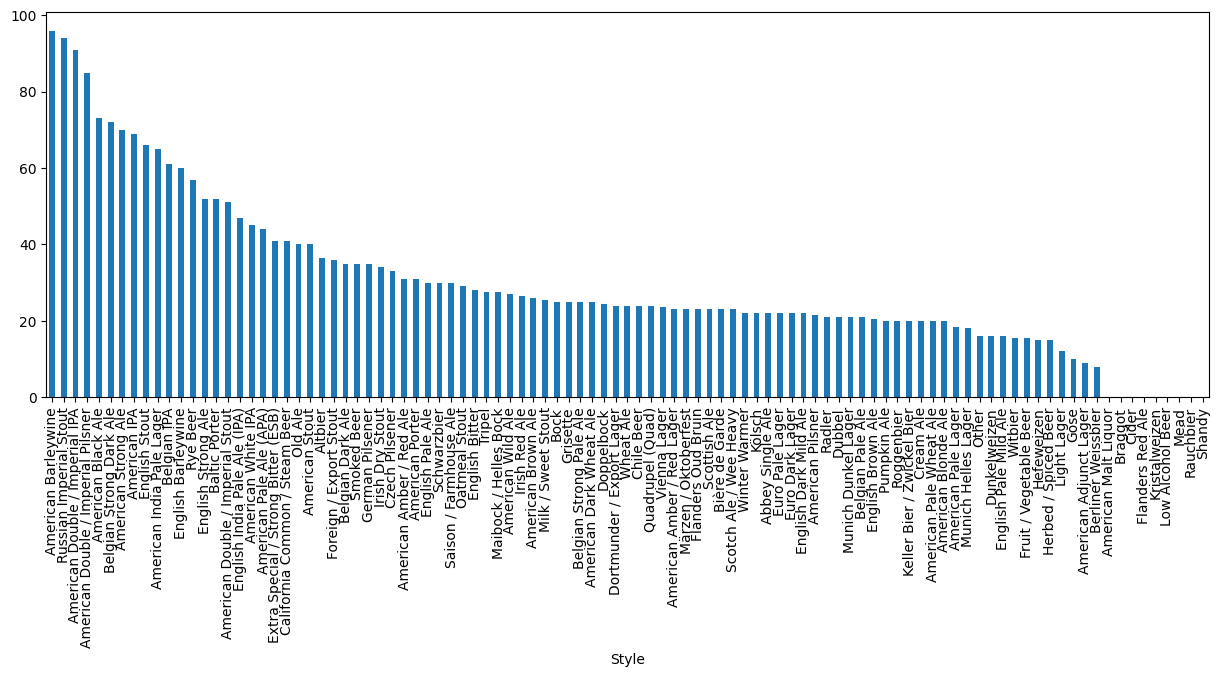

In [217]:
#unsure if graph meant bar or histogram. 
# I thought bar because it's a discrete variable (name) and median being plotted not a distribution
plt.figure(figsize=(15, 5))
beerdf.groupby("Style")["IBUs"].median().sort_values(ascending = False, na_position = "last").plot(kind = "bar");

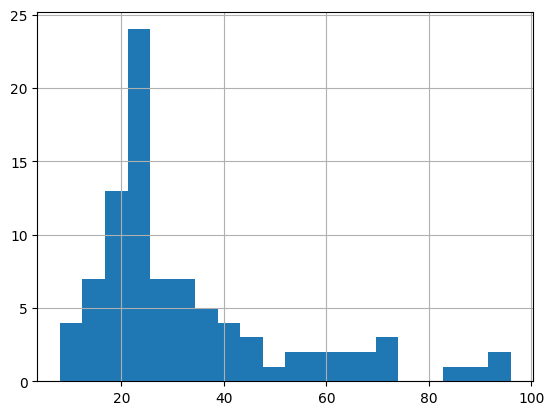

In [218]:
#but just in case

beerdf.groupby("Style")["IBUs"].median().sort_values(ascending = False, na_position = "last").hist(bins = 20);

## Hmmmm, it looks like they are generally different styles. What are the most common 5 styles of high-IBU beer vs. low-IBU beer?

- *Tip: You'll want to think about it in three pieces - filtering to only find the specific beers beers, then finding out what the most common styles are, then getting the top 5.*
- *Tip: You CANNOT do this in one command. It's going to be one command for the high and one for the low.*
- *Tip: "High IBU" means higher than 75th percentile, "Low IBU" is under 25th percentile*

In [219]:
# low IBU beers
beerdf[beerdf["IBUs"] < 21.0]["Style"].value_counts().head(5)

Style
American Pale Wheat Ale    43
American Blonde Ale        36
Fruit / Vegetable Beer     28
Hefeweizen                 21
Witbier                    20
Name: count, dtype: int64

In [220]:
# high IBU beers
beerdf[beerdf["IBUs"] > 64.0]["Style"].value_counts().head(5)

Style
American IPA                      195
American Double / Imperial IPA     72
American Pale Ale (APA)            18
American Black Ale                 15
American Strong Ale                 9
Name: count, dtype: int64

## Get the average IBU of "Witbier", "Hefeweizen" and "American Pale Wheat Ale" styles

I'm counting these as wheat beers. If you see any other wheat beer categories, feel free to include them. I want ONE measurement and ONE graph, not three separate ones. And 20 to 30 bins in the histogram, please.

- *Tip: I hope that `isin` is in your toolbox*

In [221]:
wheat_beers = ["Witbier", "Hefeweizen", "American Pale Wheat Ale"]

beerdf[beerdf["Style"].isin(wheat_beers)]["IBUs"].median()

np.float64(18.0)

## Draw a histogram of the IBUs of those beers

<Axes: >

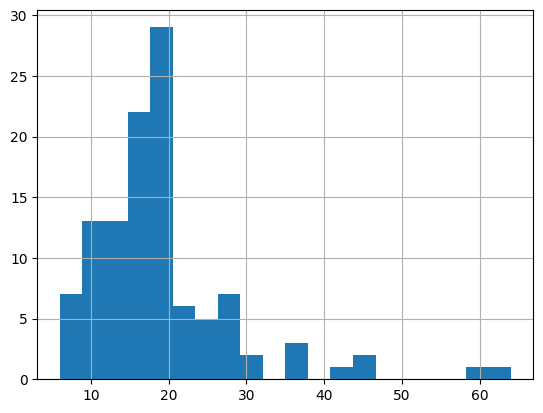

In [222]:
beerdf[beerdf["Style"].isin(wheat_beers)]["IBUs"].hist(bins = 20)

## Get the average IBU of any style with "IPA" in it (also draw a histogram)

In [223]:
IPAs["IBUs"].median()

np.float64(70.0)

<Axes: >

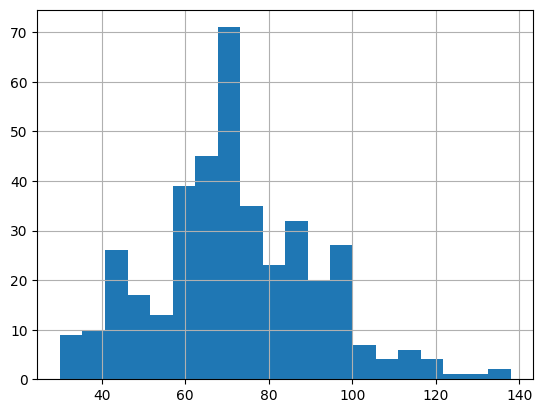

In [224]:
IPAs["IBUs"].hist(bins = 20)

## Plot those two histograms in the same cell!

I swear the behavior of this changes every year. Does it make two charts? Does it overlap them in one?

<Axes: >

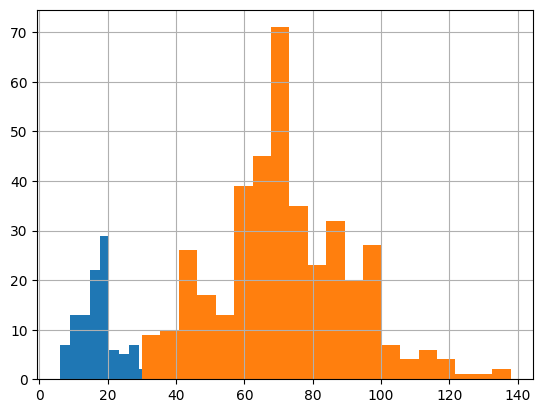

In [225]:
beerdf[beerdf["Style"].isin(wheat_beers)]["IBUs"].hist(bins = 20)
IPAs["IBUs"].hist(bins = 20)

## Compare the ABV of wheat beers vs. IPAs : their IBUs were really different, but how about their alcohol percentage?

Wheat beers might include witbier, hefeweizen, American Pale Wheat Ale, and anything else you think is wheaty. IPAs probably have "IPA" in their name.

In [226]:
beerdf[beerdf["Style"].isin(wheat_beers)]["ABV"].median()

np.float64(5.0)

In [227]:
IPAs["ABV"].median()

np.float64(6.8)

#### The median alcohol percentage of IPAs is much higher

## Good work!